In [6]:
#Import needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Import files
filename1 = "/content/Um muonlab horizontal 2 hours 2.txt"
filename2 = "/content/UM Muon Right pc 2 hours 1.txt"
filename3 = "/content/UMmuon1150-1350vert.csv"

#Load data into dataframe
dataframe_dtimes_h = pd.DataFrame()
dataframe_total_h = pd.read_csv(filename1)
dataframe_dtimes_h['Delta times (ns)'] = dataframe_total_h['Delta times (ns)']
dataframe_dtimes_h.dropna(inplace=True)

#Sort value and remove outliers (if necessary)
dataframe_dtimes_h.sort_values(by=['Delta times (ns)'], inplace=True)
dataframe_dtimes_h = dataframe_dtimes_h[~((dataframe_dtimes_h['Delta times (ns)'] == -851))]
dataframe_dtimes_h = dataframe_dtimes_h[~((dataframe_dtimes_h['Delta times (ns)'] == -578.5))]

#Load data into dataframe
dataframe_dtimes_v1 = pd.DataFrame()
dataframe_total_v1 = pd.read_csv(filename2)
dataframe_dtimes_v1['Delta times (ns)'] = dataframe_total_v1['Delta times (ns)']
dataframe_dtimes_v1.dropna(inplace=True)

#Sort value and remove outliers (if necessary)
dataframe_dtimes_v1.sort_values(by=['Delta times (ns)'], inplace=True)
dataframe_dtimes_v1 = dataframe_dtimes_v1[~((dataframe_dtimes_v1['Delta times (ns)'] == -851))]

#Load data into dataframe
dataframe_dtimes_v2 = pd.DataFrame()
dataframe_total_v2 = pd.read_csv(filename3)
dataframe_dtimes_v2['Delta times (ns)'] = dataframe_total_v2['Delta times (ns)']
dataframe_dtimes_v2.dropna(inplace=True)

#Sort value and remove outliers (if necessary)
dataframe_dtimes_v2.sort_values(by=['Delta times (ns)'], inplace=True)
dataframe_dtimes_v2 = dataframe_dtimes_v2[~((dataframe_dtimes_v2['Delta times (ns)'] == 97.5))]

     Delta times (ns)
775              -9.0
314              -8.0
800              -8.0
157              -6.5
138              -5.5
..                ...
470              15.0
113              15.0
128              16.0
446              16.5
750              18.0

[813 rows x 1 columns]
     Delta times (ns)
314              -8.0
157              -6.5
199              -5.5
138              -5.5
386              -4.5
..                ...
126              15.0
113              15.0
128              16.0
446              16.5
750              18.0

[753 rows x 1 columns]
      Delta times (ns)
16               -24.0
663              -11.5
701               -9.0
188               -8.5
678               -7.5
...                ...
48                12.0
489               12.0
652               12.5
1042              13.0
793               18.5

[1190 rows x 1 columns]
Maximum count in dataframe_dtimes_h occurs at delta time: 8.28125 ns
Maximum count in dataframe_dtimes_v1 occurs at delta t

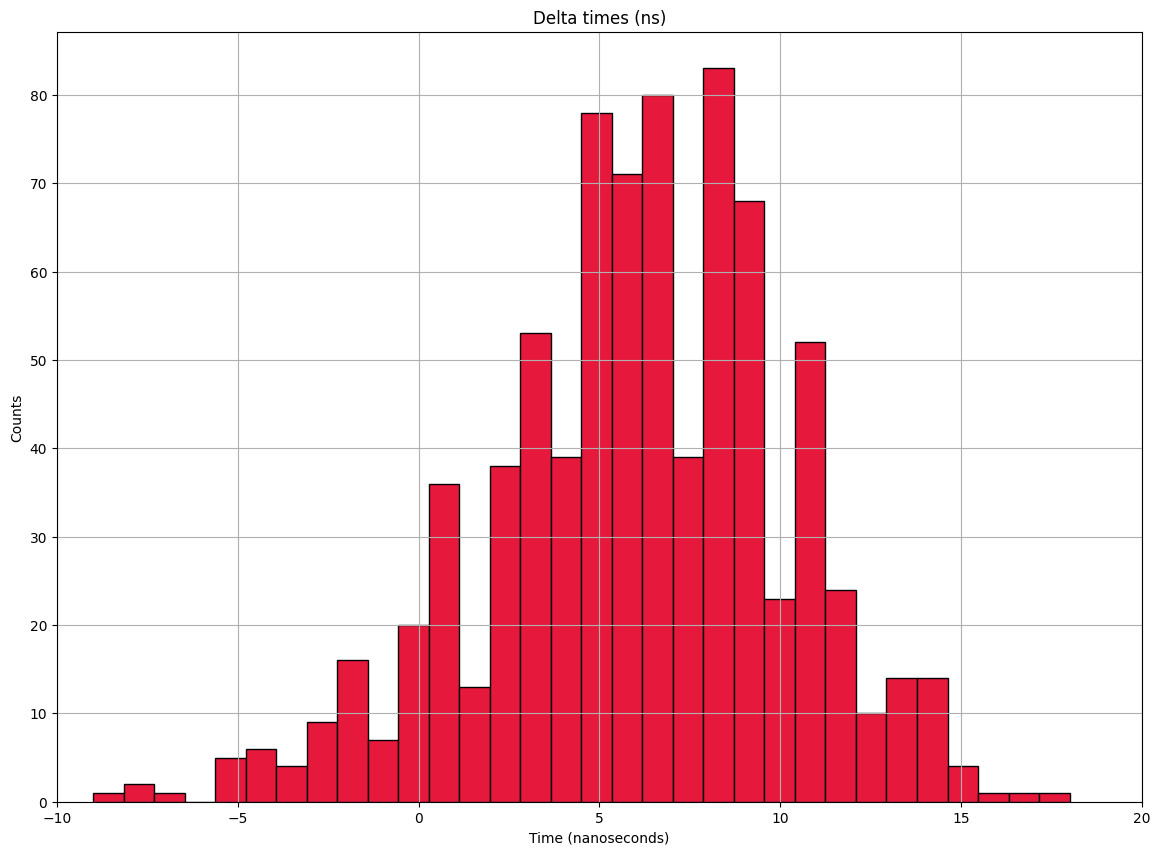

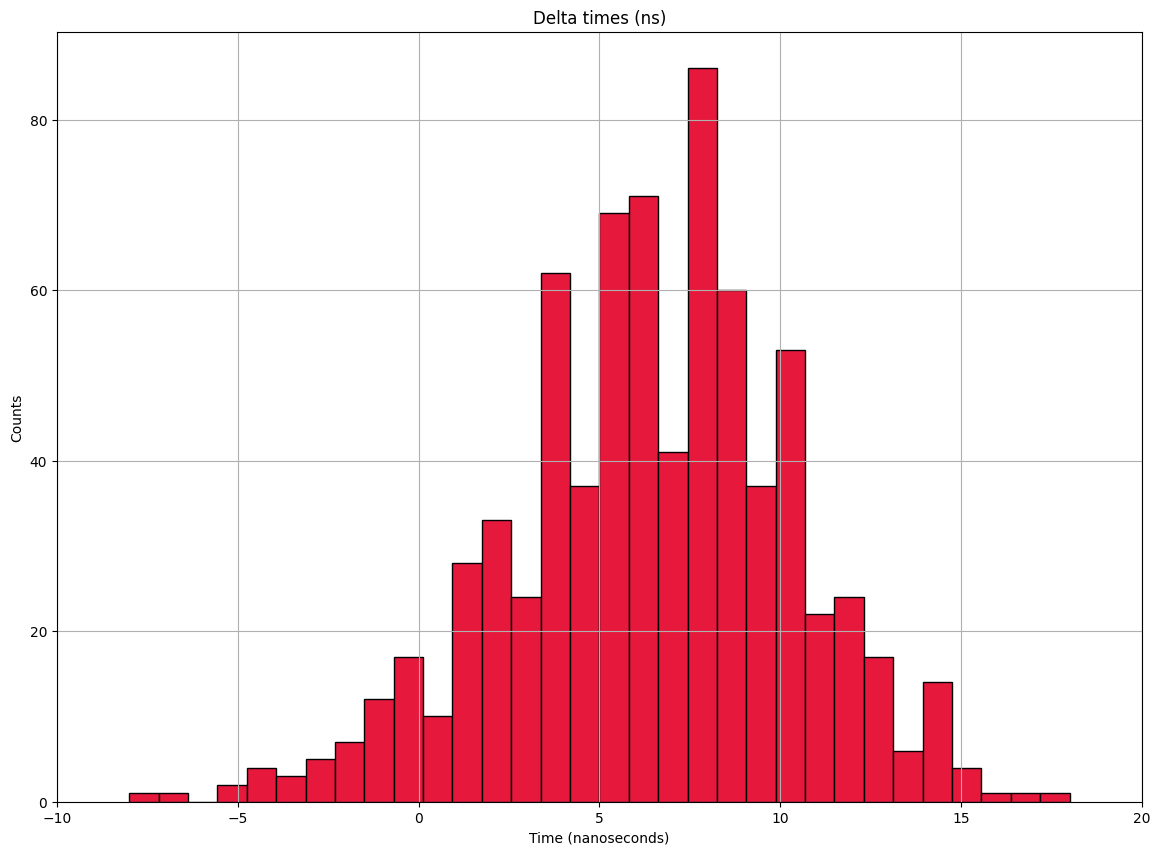

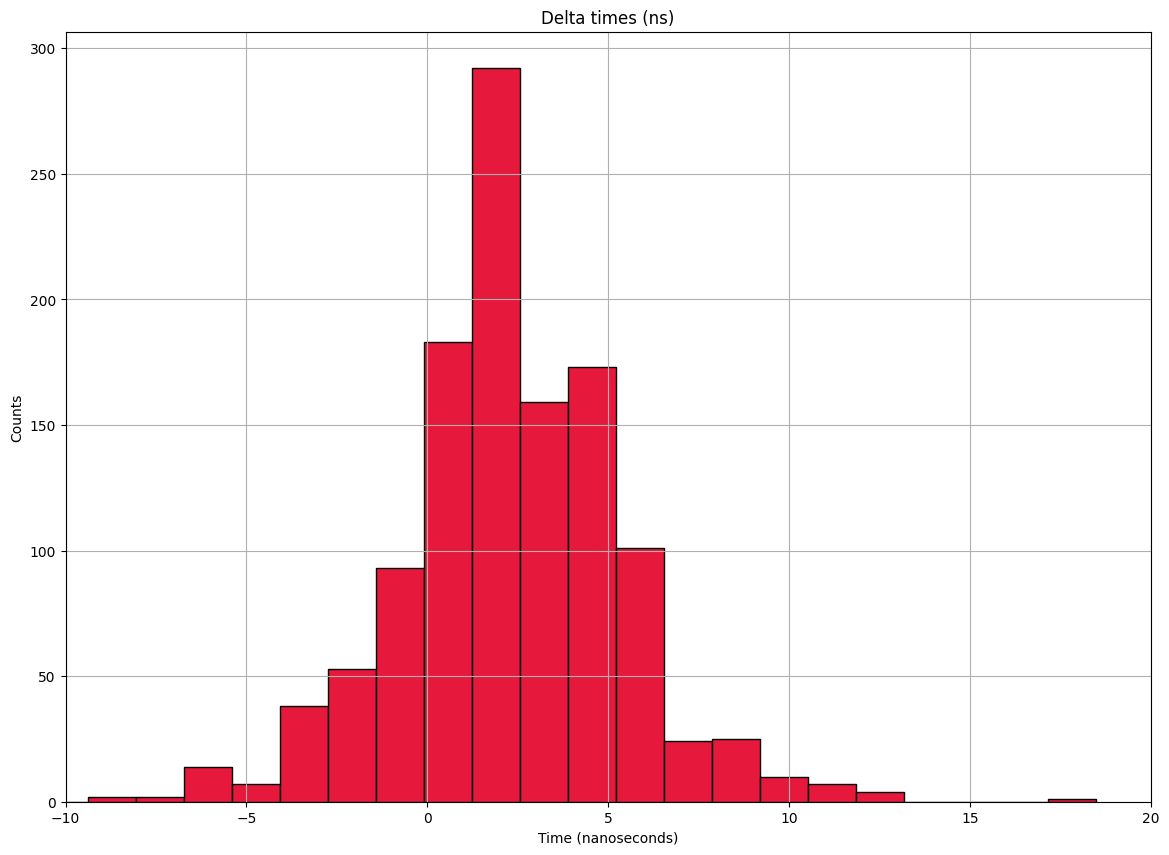

In [8]:
#Input bins and limits for the histogram
bins_h = 32
bins_v1 = 32
bins_v2 = 32
lower_limit_x = -10
upper_limit_x = 20

#Plot data in histogram
dataframe_dtimes_h.hist(bins=bins_h,
                         figsize=([14,10]),
                         linewidth=1,
                         edgecolor='black',
                         color=[230 / 255, 25 / 255, 61 / 255],
                        )
plt.xlim(lower_limit_x, upper_limit_x)
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Counts")
print(dataframe_dtimes_h)

dataframe_dtimes_v1.hist(bins=bins_v1,
                         figsize=([14,10]),
                         linewidth=1,
                         edgecolor='black',
                         color=[230 / 255, 25 / 255, 61 / 255],
                        )
plt.xlim(lower_limit_x, upper_limit_x)
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Counts")
print(dataframe_dtimes_v1)

dataframe_dtimes_v2.hist(bins=bins_v2,
                         figsize=([14,10]),
                         linewidth=1,
                         edgecolor='black',
                         color=[230 / 255, 25 / 255, 61 / 255],
                        )
plt.xlim(lower_limit_x, upper_limit_x)
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Counts")
print(dataframe_dtimes_v2)

def plot_histogram_and_find_max(data, bins, label):
    #Compute histogram
    counts, bin_edges = np.histogram(data, bins=bins, range=(lower_limit_x, upper_limit_x))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  #Calculate bin centers
    max_index = np.argmax(counts)  #Index of the bin with the maximum count
    max_delta_time = bin_centers[max_index]  #Delta time corresponding to the max count

    print(f"Maximum count in {label} occurs at delta time: {max_delta_time} ns")

#Plot and find max delta time for each dataset
plot_histogram_and_find_max(dataframe_dtimes_h, bins_h, "dataframe_dtimes_h")
plot_histogram_and_find_max(dataframe_dtimes_v1, bins_v1, "dataframe_dtimes_v1")
plot_histogram_and_find_max(dataframe_dtimes_v2, bins_v2, "dataframe_dtimes_v2")

$v = \frac{\Delta x}{\Delta t}$

$\Delta x$: 0.75 m

Horizontal $v_{Muon}$: 0.75 / (8.28125x10^-9) = 9.06x10^7 m/s

Vertical1 $v_{Muon}$: 0.75 / (8.28125x10^-9) = 9.06x10^7 m/s

Vertical2 $v_{Muon}$: 0.75 / (1.71875x10^-9) = 4.36x10^8 m/s

$Rate = \frac{Counts}{\Delta t}$

Rate Horizontal: 813 / 285.147 = 2.85 +- 0.10 Counts per Minute

Rate Vertical1: 753 / 128.647 = 5.85 +- 0.21 Counts per Minute

Rate Vertical2: 1190 / 127.345 = 9.34 +- 0.27 Counts per Minute

Rate Mean Vertical: 7.60 +- 0.24 Counts per Minute

$Φ = \frac{R}{A}$

$Φ Horizotal = \frac{2.85}{270}$ = 1.06x10^-2 +- 3.70x10^-4 muons/min/cm^2

$Φ Vertical1 = \frac{5.85}{270}$ = 2.17x10^-2 +- 7.79x10^-4 muons/min/cm^2

$Φ Vertical2 = \frac{9.34}{270}$ = 3.46x10^-2 +- 1.00x10^-3 muons/min/cm^2

$Φ Mean Vertical = \frac{7.60}{270}$ = 2.81x10^-2 +- 8.90x10^-4 muons/min/cm^2

